In [1]:
# Fix LaTeX path before importing matplotlib
import os
os.environ["PATH"] += os.pathsep + "/Library/TeX/texbin"

#Lunna's
from scipy import stats
import numpy as np
import scipy.io
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import cm
from math import ceil
from scipy.optimize import fsolve
from scipy.optimize import leastsq
from scipy.signal import find_peaks
from scipy.integrate import solve_ivp
from matplotlib.patches import Rectangle
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition,
                                                  mark_inset)
import scipy as sp
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

from matplotlib.ticker import (MultipleLocator,
                               FormatStrFormatter,
                               AutoMinorLocator)

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["computer modern roman"],
    "font.size": 20})

plw = 1.0 #0.6
pcs = 3
pms = 3
bfillc = [0.9,0.9,0.9]
plt.rcParams['axes.linewidth'] = plw
plt.rcParams['xtick.top'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['xtick.major.width'] = plw
plt.rcParams['xtick.minor.width'] = plw
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['xtick.major.size'] = 4.5
plt.rcParams['ytick.right'] = True
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['ytick.major.width'] = plw
plt.rcParams['ytick.minor.width'] = plw
plt.rcParams['ytick.minor.visible'] = True
plt.rcParams['ytick.major.size'] = 5
plt.rcParams["figure.figsize"] = (5,4)

def mscatter(x,y,ax=None, m=None, **kw):
    import matplotlib.markers as mmarkers
    if not ax: ax=plt.gca()
    sc = ax.scatter(x,y,**kw)
    if (m is not None) and (len(m)==len(x)):
        paths = []
        for marker in m:
            if isinstance(marker, mmarkers.MarkerStyle):
                marker_obj = marker
            else:
                marker_obj = mmarkers.MarkerStyle(marker)
            path = marker_obj.get_path().transformed(
                        marker_obj.get_transform())
            paths.append(path)
        sc.set_paths(paths)
    return sc
import math

/home/lunna/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/lunna/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


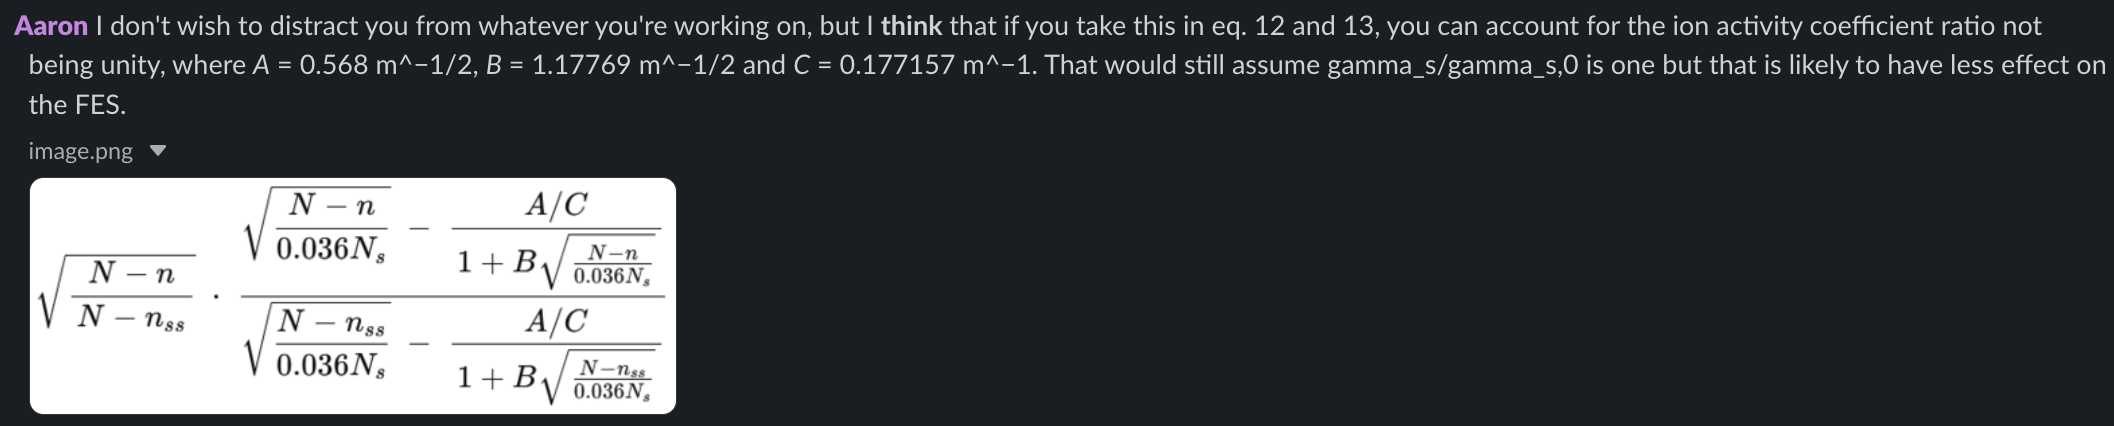

In [2]:
from IPython.display import Image
Image(filename='AC.png',width = 1000, height =800) 

<span style="color: blue;"> <font size="5"> $d\Delta F_{corr}/dn$ = 
<span style="color: red;"> <font size="5">  $-kT\ln(\gamma/\gamma^*$)
<span style="color: green;"> <font size="5"> $-nkT\frac{d\ln(\gamma/\gamma^*)}{dn}$
<span style="color: black;"> <font size="5">  $+NkT\frac{d\ln(\gamma/\gamma_0)}{dn}$

<span style="color: red;"> <font size="5"> $\ln(\gamma/\gamma^*)=\ln(10)\bigg(\log_{10} \gamma -\log_{10} \gamma^*\bigg)$

<span style="color: red;"> <font size="5"> $\log_{10} \gamma = \frac{-A\sqrt{b_\mathrm{NaCl}}}{1+B\sqrt{b_\mathrm{NaCl}}}+Cb_\mathrm{NaCl}$ 
    
<span style="color: red;"> <font size="5"> $\log_{10} \gamma^* = \frac{-A\sqrt{b^*_\mathrm{NaCl}}}{1+B\sqrt{b^*_\mathrm{NaCl}}}+Cb^*_\mathrm{NaCl}$     
    
<span style="color: black;"> <font size="4"> $b_\mathrm{NaCl}=m$ is the molarity of NaCl, relate molarity to number that can be sampled from $NVT$ simulations, 
    
    
<span style="color: red;"> <font size="5"> $b_\mathrm{NaCl} = m = \frac{N-n}{0.036N_s}$

<span style="color: black;"> <font size="4"> Next, relation between $b^*_\mathrm{NaCl}$ and $x^*$, or more generally, between any pairs of $b_\mathrm{NaCl}$ and $x$, but not in the context of $NVT$ simulation, where $N$, $n$ and $N_s$ can be counted. 
    
<span style="color: black;"> <font size="4"> I used reference $x^*$ = 0.0625 and $b^*_\mathrm{NaCl}$=3.7 mol kg$^{-1}$ throughout, so the conversion between my mole fraction and molality I was also using the factor of 0.0625/3.7. Is this the correct way though?  
    
<span style="color: black;"> <font size="4"> I think I need to correct for SI_6.png, since I was only using this factor here, which is only approximate, 
    
    

<span style="color: red;"> <font size="5"> In general, $x_{ion} = x = \frac{2m}{2m+55.5}$ with $m=b_\mathrm{NaCl}$
    
    
<span style="color: red;"> <font size="5"> In general, $x_\mathrm{NaCl} = \frac{m}{m+55.5}$ with $m=b_\mathrm{NaCl}$
    
<span style="color: black;"> <font size="4"> 55.5 mol of water in 1 kg of water
 
<span style="color: red;"> <font size="5"> $b_\mathrm{NaCl} = m = \frac{55.5x}{2(1-x)}$ 
  
<span style="color: black;"> <font size="4"> so to relate to $x^*$
    
<span style="color: red;"> <font size="5"> $b^*_\mathrm{NaCl} = m = \frac{55.5x^*}{2(1-x^*)}$
    
<span style="color: red;"> <font size="5"> $b_\mathrm{NaCl} = m =\frac{55.5x_\mathrm{NaCl}}{1-x_\mathrm{NaCl}}$
    
<span style="color: red;"> <font size="5"> $x = \frac{2x_\mathrm{NaCl}}{1+x_\mathrm{NaCl}}$ OR 
    
<span style="color: red;"> <font size="5">  $x_\mathrm{NaCl}=\frac{x}{2-x}$

<span style="color: black;"> <font size="5"> The following will be used for fitting, $x^*$ is the to be determined equilibrium mole fraction 

<span style="color: red;"> <font size="5"> $\log_{10} \gamma = \frac{-A\sqrt{\frac{N-n}{0.036N_s}}}{1+B\sqrt{\frac{N-n}{0.036N_s}}}+C\frac{N-n}{0.036N_s}$ (the same as Aaron)

<span style="color: red;"> <font size="5"> $\log_{10} \gamma^* = \frac{-A\sqrt{\frac{55.5x^*}{2(1-x^*)}}}{1+B\sqrt{\frac{55.5x^*}{2(1-x^*)}}}+C\frac{55.5x^*}{2(1-x^*)}$ 
    
OR
    
<span style="color: red;"> <font size="5"> $\log_{10} \gamma^* = \frac{-A\sqrt{\frac{N-n_{ss}}{0.036N_s}}}{1+B\sqrt{\frac{N-n_{ss}}{0.036N_s}}}+C\frac{N-n_{ss}}{0.036N_s}$ (the same as Aaron)
    
    
<span style="color: black;"> <font size="4"> $\log_{10}\gamma^*$ is similar to Aaron but we need to express it as a function of $x^*$, insteand of $n_{ss}$. The reason is that it is the true equilibrium that we are trying to compute, not the finite-size steady-state mole fraction $x_{ss}$.     
    

<span style="color: black;"> <font size="5"> Now, go to the second term derived by Aaron (double check the expression for $\log_{10} \gamma^*$

<span style="color: green;"> <font size="5"> $-nkT\frac{d\ln(\gamma/\gamma^*)}{dn}$

<span style="color: green;"> <font size="5"> $\frac{d\ln(\gamma/\gamma^*)}{dn} = \frac{\ln(10)}{N_s} \bigg[  \frac{A}{2\sqrt{\frac{N-n}{0.036N_s}}\big(1+B\sqrt{\frac{N-n}{0.036N_s}}\big)^2}-C\bigg]$ (the same as Aaron)
    
<span style="color: black;"> <font size="4"> However, if we do not use $n_{ss}$ but $x^*$
    
<span style="color: green;"> <font size="5"> $\ln(\gamma/\gamma^*)/\ln(10)=\bigg(\frac{-A\sqrt{\frac{N-n}{0.036N_s}}}{1+B\sqrt{\frac{N-n}{0.036N_s}}}+C\frac{N-n}{0.036N_s} \bigg) - \bigg( \frac{-A\sqrt{\frac{55.5x^*}{2(1-x^*)}}}{1+B\sqrt{\frac{55.5x^*}{2(1-x^*)}}}+C\frac{55.5x^*}{2(1-x^*)} \bigg)$
    
    
<span style="color: black;"> <font size="4">  Then $d\ln(\gamma/\gamma^*)/dn$, 
    
    
<span style="color: green;"> <font size="5"> $\frac{d\bigg( \frac{-A\sqrt{\frac{55.5x^*}{2(1-x^*)}}}{1+B\sqrt{\frac{55.5x^*}{2(1-x^*)}}}+C\frac{55.5x^*}{2(1-x^*)} \bigg)}{dn} = 0$ (please confirm with Aaron or Matteo, my logic is that $x^*$ is a constant unknown that is not changing with $n$ indeed. 
    
<span style="color: black;"> <font size="4">  So for the second term, we only need to compute, 
  
<span style="color: green;"> <font size="5"> $d\ln(\gamma/\gamma^*)/dn = \ln(10) \frac{d\bigg(\frac{-A\sqrt{\frac{N-n}{0.036N_s}}}{1+B\sqrt{\frac{N-n}{0.036N_s}}}+C\frac{N-n}{0.036N_s} \bigg)}{dn}$

<span style="color: black;"> <font size="5"> Now, go to the third term
    
<span style="color: black;"> <font size="5"> $+NkT\frac{d\ln(\gamma/\gamma_0)}{dn}$
    
<span style="color: black;"> <font size="5"> $\ln(\gamma/\gamma_0) = \ln(\gamma) - \ln(\gamma_0) = \ln(10) \bigg( \log_{10}(\gamma) - \log_{10}(\gamma_0) \bigg)$
    
<span style="color: black;"> <font size="5"> $x_0 = \frac{N}{N_s+N}$ so $\gamma_0$ is not changing with $n$, so 
    
<span style="color: black;"> <font size="5"> $d\ln(\gamma/\gamma_0)/dn = \ln(10) \frac{d\bigg( \log_{10}(\gamma) - \log_{10}(\gamma_0) \bigg)}{dn} = \ln(10) \frac{d\bigg( \log_{10}(\gamma) \bigg)}{dn}$
    
<span style="color: black;"> <font size="4"> from above,  
    
<span style="color: black;"> <font size="5"> $\log_{10} \gamma = \frac{-A\sqrt{\frac{N-n}{0.036N_s}}}{1+B\sqrt{\frac{N-n}{0.036N_s}}}+C\frac{N-n}{0.036N_s}$ (the same as Aaron), so 
    
<span style="color: black;"> <font size="5"> $d\ln(\gamma/\gamma_0)/dn = \ln(10) \frac{d\bigg(\frac{-A\sqrt{\frac{N-n}{0.036N_s}}}{1+B\sqrt{\frac{N-n}{0.036N_s}}}+C\frac{N-n}{0.036N_s} \bigg)}{dn}$

<span style="color: blue;"> <font size="5"> $d\Delta F_{corr}/dn$ = 
<span style="color: red;"> <font size="5">  $-kT\ln(\gamma/\gamma^*$)
<span style="color: green;"> <font size="5"> $-nkT\frac{d\ln(\gamma/\gamma^*)}{dn}$
<span style="color: black;"> <font size="5">  $+NkT\frac{d\ln(\gamma/\gamma_0)}{dn}$
    
    
<span style="color: red;"> <font size="5">  $-kT\ln(10) \bigg[ \bigg( \frac{-A\sqrt{\frac{N-n}{0.036N_s}}}{1+B\sqrt{\frac{N-n}{0.036N_s}}}+C\frac{N-n}{0.036N_s} \bigg) - \bigg( \frac{-A\sqrt{\frac{55.5x^*}{2(1-x^*)}}}{1+B\sqrt{\frac{55.5x^*}{2(1-x^*)}}}+C\frac{55.5x^*}{2(1-x^*)} \bigg) \bigg]$
    
<span style="color: green;"> <font size="5"> $-nkT \bigg[\ln(10) \frac{d\bigg(\frac{-A\sqrt{\frac{N-n}{0.036N_s}}}{1+B\sqrt{\frac{N-n}{0.036N_s}}}+C\frac{N-n}{0.036N_s} \bigg)}{dn} \bigg]$
    
 <span style="color: black;"> <font size="5">  $+NkT \bigg[ \ln(10) \frac{d\bigg(\frac{-A\sqrt{\frac{N-n}{0.036N_s}}}{1+B\sqrt{\frac{N-n}{0.036N_s}}}+C\frac{N-n}{0.036N_s} \bigg)}{dn} \bigg]$

<span style="color: blue;"> <font size="5"> $d\Delta F_{corr}/dn$ = 
<span style="color: red;"> <font size="5">  $-kT\ln(\gamma/\gamma^*$)
<span style="color: purple;"> <font size="5"> $-nkT\frac{d\ln(\gamma/\gamma^*)}{dn}$
<span style="color: purple;"> <font size="5">  $+NkT\frac{d\ln(\gamma/\gamma_0)}{dn}$
    
    
<span style="color: red;"> <font size="5">  $-kT\ln(10) \bigg[ \bigg( \frac{-A\sqrt{\frac{N-n}{0.036N_s}}}{1+B\sqrt{\frac{N-n}{0.036N_s}}}+C\frac{N-n}{0.036N_s} \bigg) - \bigg( \frac{-A\sqrt{\frac{55.5x^*}{2(1-x^*)}}}{1+B\sqrt{\frac{55.5x^*}{2(1-x^*)}}}+C\frac{55.5x^*}{2(1-x^*)} \bigg) \bigg]$
        
 <span style="color: purple;"> <font size="5">  $(+NkT-nkT) \bigg[ \ln(10) \frac{d\bigg(\frac{-A\sqrt{\frac{N-n}{0.036N_s}}}{1+B\sqrt{\frac{N-n}{0.036N_s}}}+C\frac{N-n}{0.036N_s} \bigg)}{dn} \bigg]$

In [3]:
np.log10(10)

1.0

In [4]:
np.log(10)

2.302585092994046

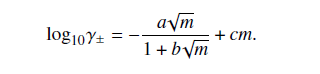

In [7]:
Image(filename='brine.png',width = 300, height =200) #from NaCl paper brine